## Data analysis

Before building any machine learning models, we first performed a thorough analysis of the dataset. The goal was to better understand the data, identify patterns, and determine which features have the most significant impact on car prices. By making different graphs the overall picture was much clearer.

Additionally, this analysis allowed us to visualize relationships between key features, such as age, mileage, and engine size, and their effect on price. Understanding these relationships was crucial for selecting the most suitable models and ensuring that our predictions would be as accurate and reliable as possible. Through this process, we gained insights into which variables contributed most to price variation and how different car characteristics interact with each other.

In [1]:
import pandas as pd

# Data loading
df = pd.read_csv("CarsData_cleaned.csv")
df = pd.read_csv("CarsData_cleaned.csv", sep=';')

In [2]:
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize', 'Manufacturer'],
      dtype='object')


### Correlation Analysis

Before building machine learning models, we want to understand how key numerical features are related to each other and to the target variable "price"  
Correlation analysis helps identify strong relationships, which can guide feature selection and model building. Here, we analyze correlations between price, age, mileage, engine size, and year.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the age of the car
df['age'] = 2025 - df['year']  

# Display correlation between price, age, and mileage
print("Correlation between price, age, and mileage:")
print(df[['price', 'age', 'mileage']].corr())

# Select only numerical columns for full correlation analysis
numeric_cols = ['price', 'mileage', 'engineSize', 'age']

# Calculate the correlation matrix for numerical features
correlations = df[numeric_cols].corr()
print("Correlation matrix for numerical features:")
print(correlations)


Correlation between price, age, and mileage:
            price       age   mileage
price    1.000000 -0.492491 -0.417996
age     -0.492491  1.000000  0.739664
mileage -0.417996  0.739664  1.000000
Correlation matrix for numerical features:
               price   mileage  engineSize       age
price       1.000000 -0.417996    0.639356 -0.492491
mileage    -0.417996  1.000000    0.107299  0.739664
engineSize  0.639356  0.107299    1.000000  0.035639
age        -0.492491  0.739664    0.035639  1.000000


### Correlation Analysis

#### Price vs Age (price vs age)
Correlation: -0.49
Insight: As expected, car price decreases as the car gets older. There is a moderate negative correlation, meaning newer cars tend to be more expensive.

#### Price vs Mileage (price vs mileage)
Correlation: -0.42
Insight: Cars with higher mileage have lower prices. This is also a moderate negative correlation.

#### Age vs Mileage (age vs mileage)
Correlation: 0.74
Insight: Older cars tend to have higher mileage, which makes sense. This is a strong positive correlation.

#### Price vs Engine Size (price vs engineSize)
Correlation: 0.64
Insight: Cars with larger engines tend to be more expensive. This is a strong positive correlation.

#### Year vs Price (year vs price)
Correlation: 0.49
Insight: Newer cars have higher prices, consistent with the negative correlation between price and age.

#### Year vs Mileage (year vs mileage)
Correlation: -0.74
Insight: Newer cars tend to have lower mileage, which aligns with the strong positive correlation between age and mileage.

#### Engine Size vs Age/Year
Correlations are very low (0.035 with age, -0.036 with year), indicating there isn't any correlation between them.

### Overall Observations
Strongest factors affecting price: Age, mileage, and engine size.

Predictive insight: For price prediction, numerical key features should include year, mileage, and engineSize. Other features like manufacturer, model, fuel type, and transmission can be added later as categorical variables.

## Graphs

#### Price vs Age (Scatterplot)
This scatterplot shows the relationship between the car’s age and its price.

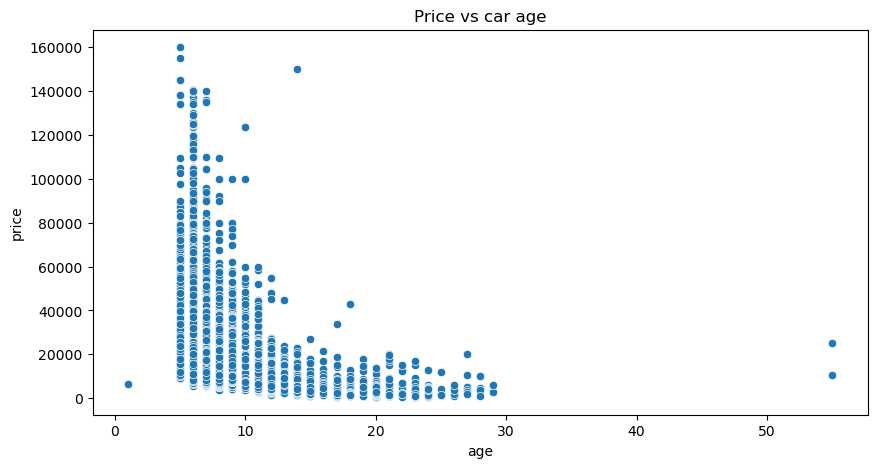

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='price', data=df)
plt.title("Price vs car age")
plt.show()

It shows a clear, strong negative correlation, meaning a car's price consistently falls as its age increases. The trend is not perfectly linear, with the most dramatic value loss occurring in the 7-8 years.

#### Price vs Mileage (Scatterplot)

This plot shows how car price varies with mileage. The plot shows a moderate negative correlation, with most points clustered at lower mileage and higher price.

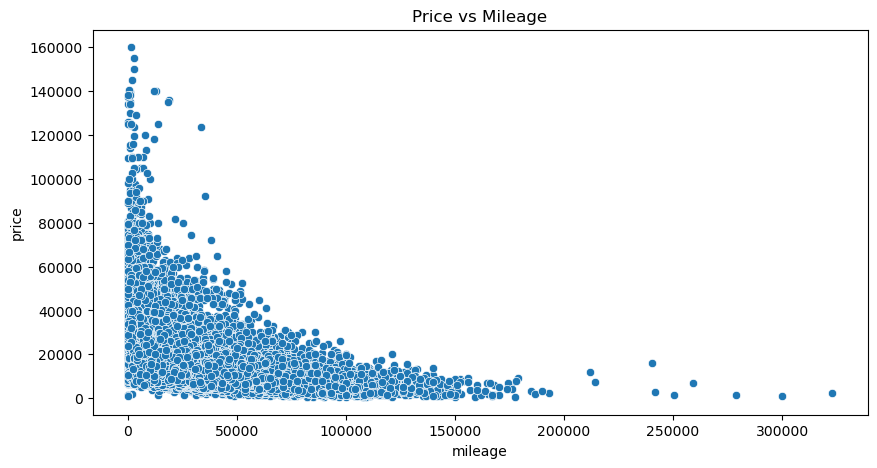

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Price vs Mileage")
plt.show()

The data points are densely clustered in a downward-sloping pattern, confirming that higher mileage is a key driver of lower market value. This trend underscores the principle that wear and usage.

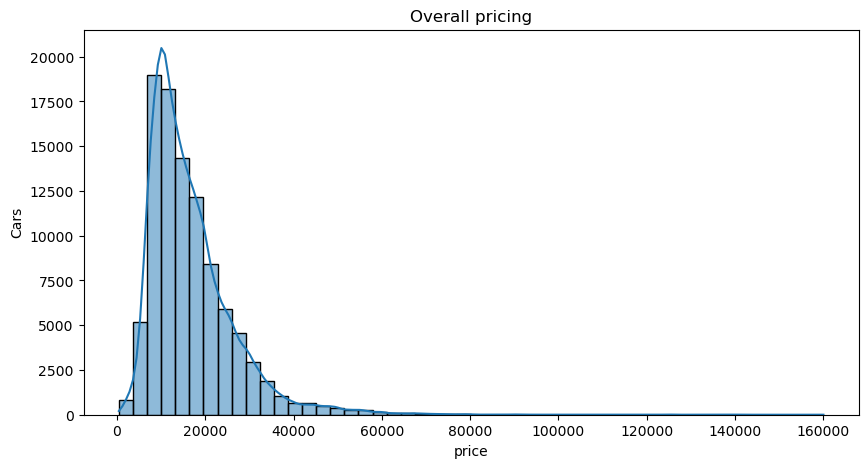

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Overall pricing")
plt.ylabel("Cars")
plt.show()

The distribution is heavily right-skewed, meaning there are a few very expensive cars that create a long tail to the right.



#### Price Distribution (Histogram)

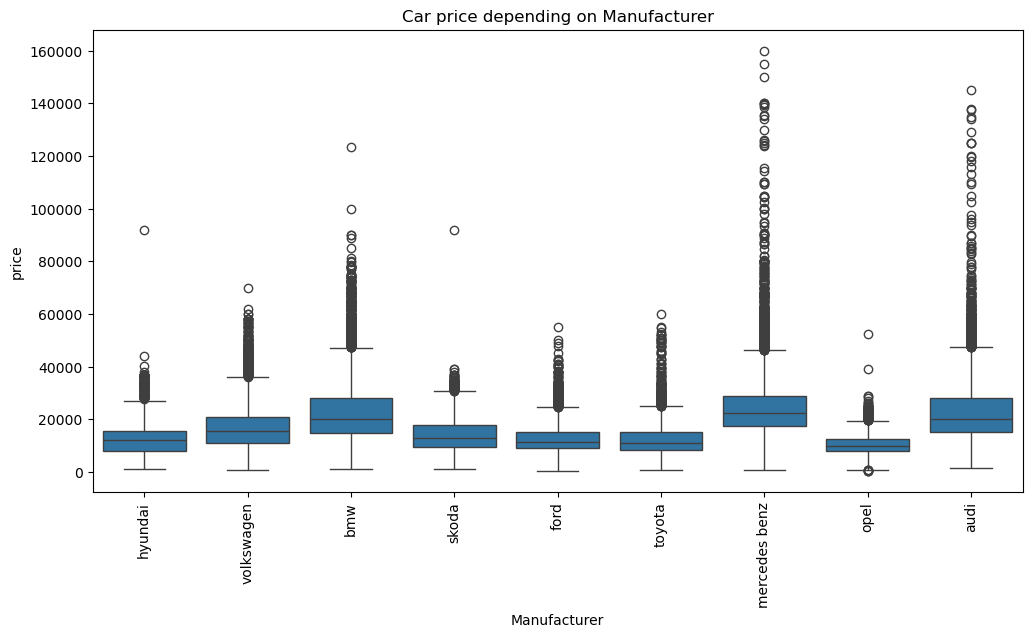

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Manufacturer', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Car price depending on Manufacturer")
plt.show()

#### Price vs Mileage Density (Hexbin Plot)

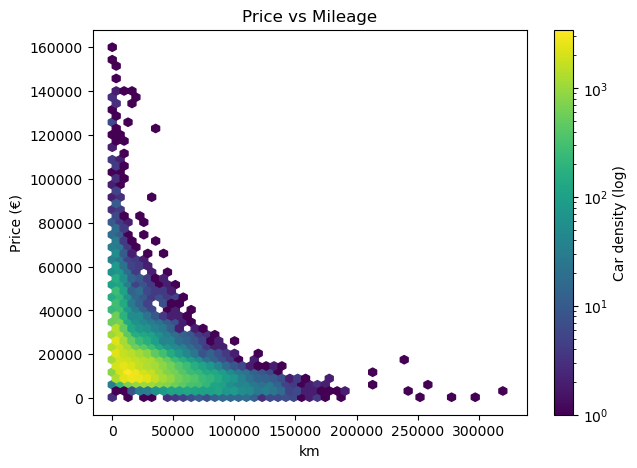

In [16]:
x = df['mileage']
y = df['price']

plt.figure(figsize=(7,5))
plt.hexbin(x, y, gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='Car density (log)')
plt.xlabel("km")
plt.ylabel("Price (€)")
plt.title("Price vs Mileage")
plt.show()

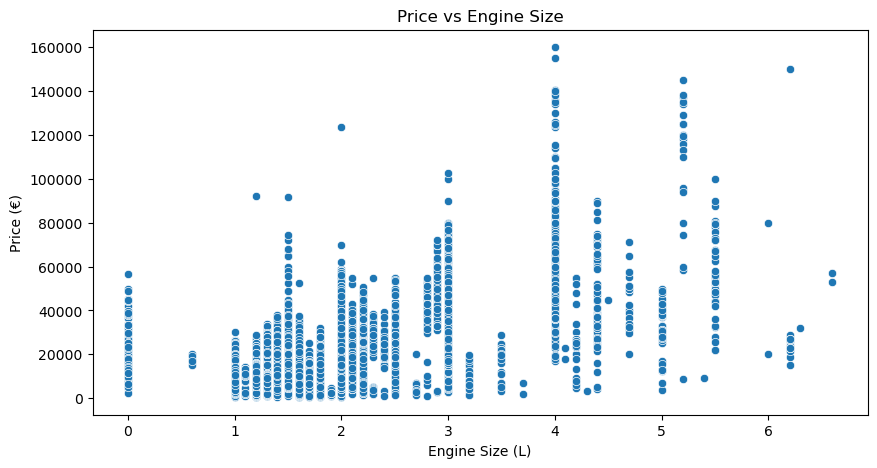

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='engineSize', y='price', data=df)
plt.title("Price vs Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (€)")
plt.show()

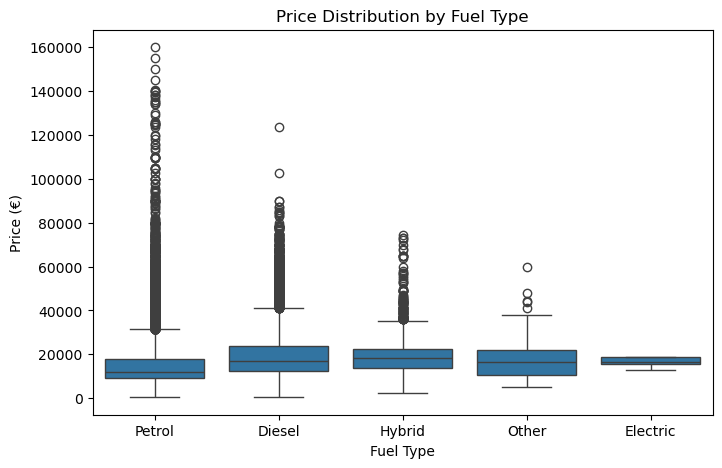

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price (€)")
plt.show()


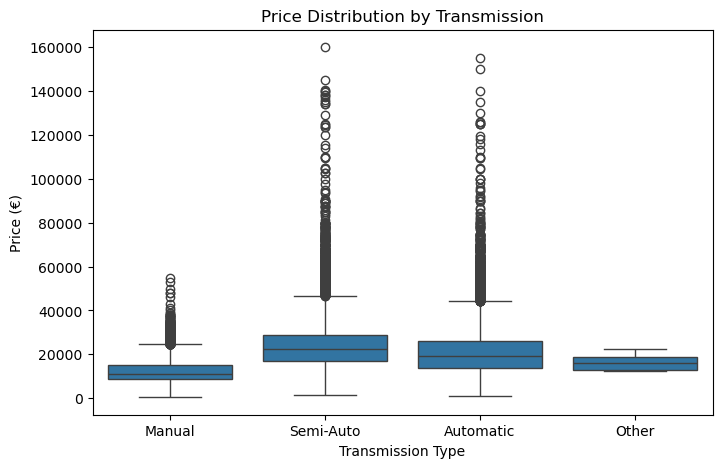

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Price Distribution by Transmission")
plt.xlabel("Transmission Type")
plt.ylabel("Price (€)")
plt.show()